In [1]:
import numpy as np
from mnist import MNIST
mndata = MNIST('.')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import time
import random
from sklearn.cluster import KMeans,MiniBatchKMeans
from collections import Counter, defaultdict
from tqdm import tqdm
#from imblearn.under_sampling import CondensedNearestNeighbour

In [2]:
#Protoyping
class prototyping():
    def __init__(self):
        self.x_train_sampled = []
        self.x_label_sampled = []
          
    def sample(self, x_train, x_label, num_sample, strategy = 'Random'):
        #self.x_train = x_train
        #self.x_label = x_label
        self.strategy = strategy
        self.num_sample = num_sample
        
        if self.strategy == 'Random':
            self.random_sampler(x_train, x_label)
            
        if self.strategy == 'kmeans':
            self.kmeans_sampler(x_train, x_label)
        
        return self.x_train_sampled, self.x_label_sampled
        
    def random_sampler(self, x_train, x_label):
        self.x_train_sampled = []
        self.x_label_sampled = []
        data_length = len(x_train)
        # create an array for index sampling
        index = random.sample(range(data_length), self.num_sample)
        self.x_train_sampled = [x_train[i] for i in index]
        self.x_label_sampled = [x_label[i] for i in index]  
        
    def kmeans_sampler(self, x_train, x_label):
        self.x_train_sampled = []
        self.x_label_sampled = []
        #split the data according to class
        train_data_dic = defaultdict(list)
        for i in range(len(x_label)):
            train_data_dic[x_label[i]].append(x_train[i]) #dict of each label
        
        num_samples_per_class = int(self.num_sample/10)
        train_img_sample_dict = defaultdict(list)

        for i in range(len(train_data_dic)):
            prototyping_example2 = MiniBatchKMeans(n_clusters = num_samples_per_class)
            prototyping_example2.fit(train_data_dic[i])
            train_img_sample_dict[i] = prototyping_example2.cluster_centers_   
    
        for i in range(len(train_img_sample_dict)):
            self.x_train_sampled.extend(train_img_sample_dict[i])
            self.x_label_sampled.extend(num_samples_per_class*[i])


In [3]:
# prediction and timing
def pred_timing(xtrain_set, xtrain_label, xtest_set, xtest_label):
    neighbour_classifier = KNeighborsClassifier(n_neighbors=1)
    #time taken for fitting the data
    start = time.time()
    neighbour_classifier.fit(xtrain_set, xtrain_label)
    stop = time.time()
    fit_time = stop - start
    #time taken for prediction 
    start = time.time()
    z = neighbour_classifier.predict(xtest_set)
    stop = time.time()
    prediction_time = stop - start
    accuracy = accuracy_score(list(xtest_label),z)
    return z,accuracy, fit_time, prediction_time

In [4]:
#Read data
#complete test and train image
test_img, test_label = mndata.load_testing()
train_img, train_label = mndata.load_training()

In [5]:
#counts
print("Number of training examples are ",len(train_img))
print("Number of test examples are ",len(test_img))

Number of training examples are  60000
Number of test examples are  10000


In [6]:
#knn on entire dataset
_,accuracy_full, fit_time_full, prediction_time_full = pred_timing(train_img, train_label,test_img, test_label)

In [7]:
#using a subset of data by random sampling
accuracy_random_iter = []
fit_time_random_iter = []
prediction_time_random_iter = []
total_time_random_iter = []
for iter in tqdm(range(0,10)):
    prototyping_example1 = prototyping()
    num_sample = [1000, 5000, 10000]
    accuracy_random = []
    fit_time_random = []
    prediction_time_random = []
    total_time_random = []

    for n in num_sample:
        train_img_sample, train_label_sample = prototyping_example1.sample(train_img, train_label, num_sample = n)
        _,accuracy,fit_time,prediction_time = pred_timing(train_img_sample, train_label_sample, test_img, test_label)
        accuracy_random.append(accuracy)
        fit_time_random.append(fit_time)
        prediction_time_random.append(prediction_time)
        total_time_random.append(fit_time+prediction_time)
        #print(len(train_img_sample))
        
    accuracy_random_iter.append(accuracy_random)
    fit_time_random_iter.append(fit_time_random)
    prediction_time_random_iter.append(prediction_time_random)
    total_time_random_iter.append(total_time_random)

100%|██████████| 10/10 [39:48<00:00, 238.90s/it]


In [8]:
#using a subset of a data by kmeans sampling
accuracy_knn_iter = []
fit_time_knn_iter = []
prediction_time_knn_iter = []
total_time_knn_iter = []

for iter in tqdm(range(0,10)):
    prototyping_example2 = prototyping()
    num_sample = [1000, 5000, 10000]
    accuracy_knn = []
    fit_time_knn = []
    prediction_time_knn = []
    total_time_knn = []
    for n in num_sample:
        train_img_sample, train_label_sample = prototyping_example2.sample(train_img, train_label, num_sample = n, strategy = 'kmeans')
        _,accuracy,fit_time,prediction_time = pred_timing(train_img_sample, train_label_sample, test_img, test_label)
        accuracy_knn.append(accuracy)
        fit_time_knn.append(fit_time)
        prediction_time_knn.append(prediction_time)
        total_time_knn.append(fit_time+prediction_time)
        #print(len(train_img_sample))
    
    accuracy_knn_iter.append(accuracy_knn)
    fit_time_knn_iter.append(fit_time_knn)
    prediction_time_knn_iter.append(prediction_time_knn)
    total_time_knn_iter.append(total_time_knn)


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1418: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1418: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
100%|██████████| 10/10 [1:37:51<00:00, 587.20s/it]


In [13]:
mean_accuracy_knn_iter = np.mean(accuracy_knn_iter, axis = 0)*100
mean_accuracy_random_iter = np.mean(accuracy_random_iter, axis = 0)*100

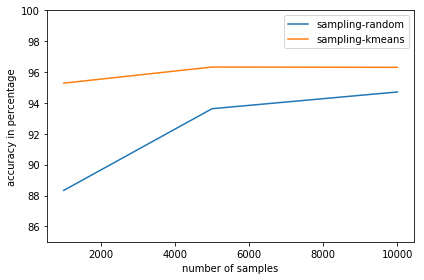

In [14]:
plt.plot(num_sample, mean_accuracy_random_iter,label = 'sampling-random')
plt.ylim((85,100))
plt.plot(num_sample, mean_accuracy_knn_iter, label = 'sampling-kmeans')
plt.xlabel(('number of samples'))
plt.ylabel(('accuracy in percentage'))
plt.tight_layout()
plt.legend()

array([0.88332, 0.93628, 0.94712])